In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[UCI MAGIC repository link](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

In [ ]:
pd.read_csv("/content/drive/MyDrive/Datasets/Magic-gamma-hadron/magic04.data")

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

In [ ]:
# We can see that the data does not have the column names so we have
# to take them from the attribute lists mentioned on the UCI website
# We will create a list of 'cols' with the attributes/column names seen above

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names= cols) #Assigning labels from the cols to the columns of the data set
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
# We are going to convert g to 1 and h to 0    , that is True or False

In [ ]:
df["class"] = (df["class"]=="g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

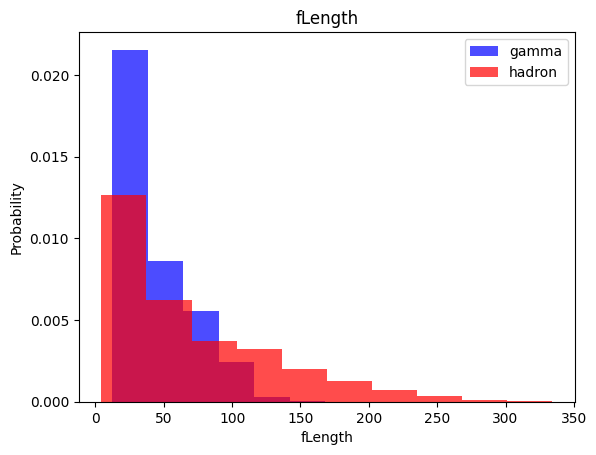

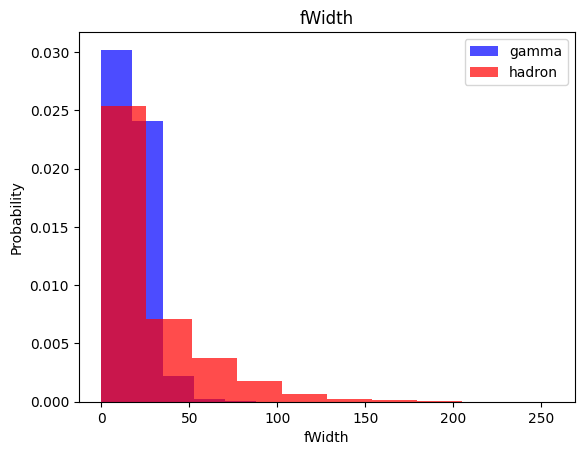

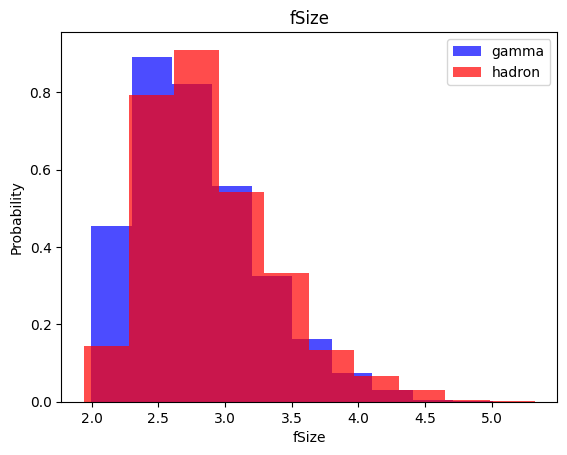

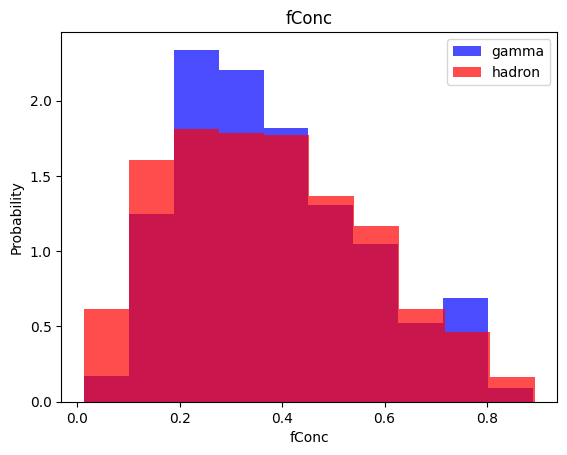

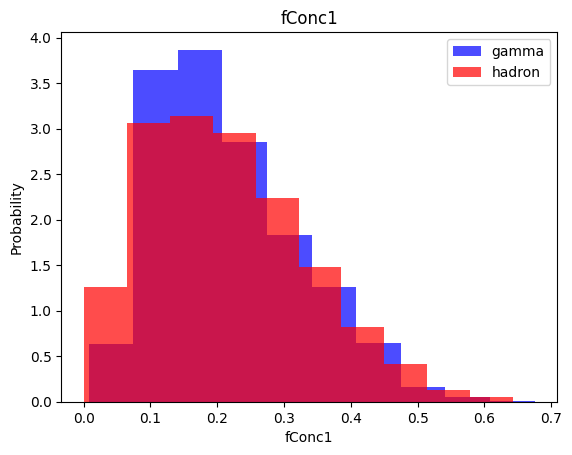

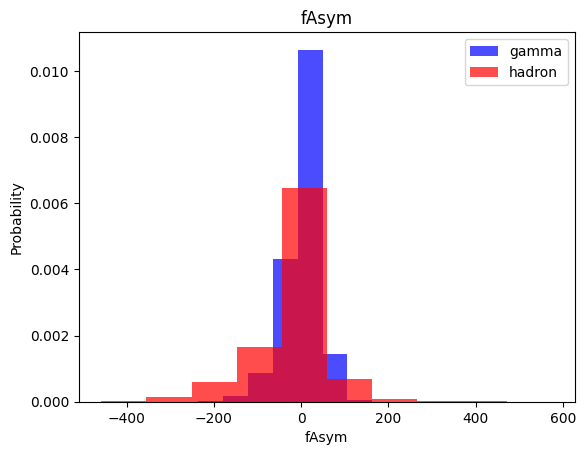

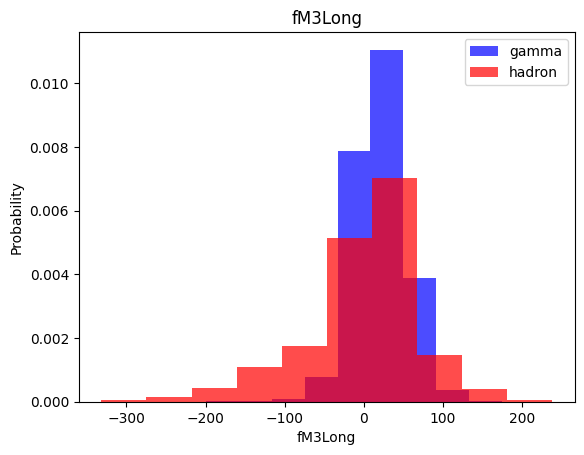

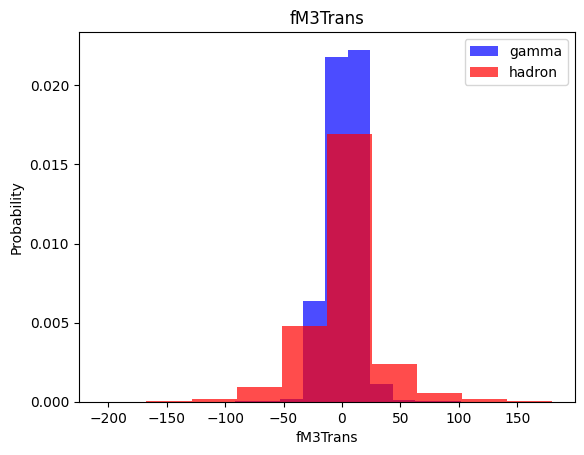

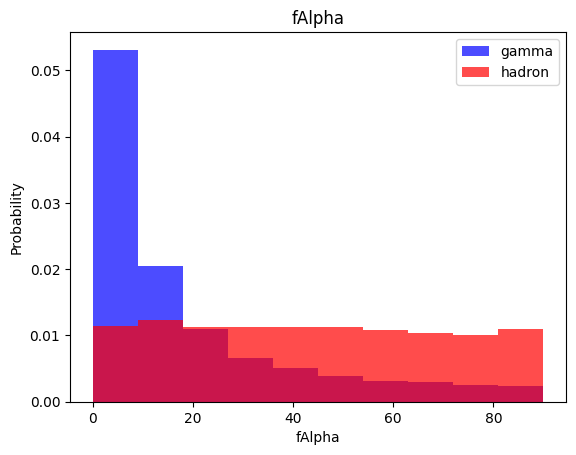

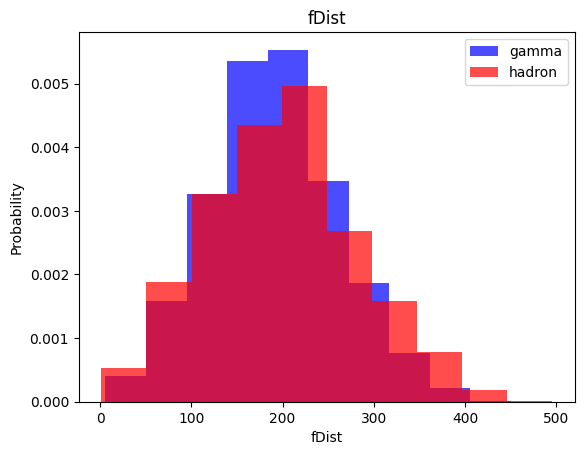

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = 'blue', label ='gamma', alpha = 0.7, density = True) # denisty true normalises the distribution for eaiser comparison, if you have 200 of one type and 50 of another , by normalizing we distribute over how many samples are there
  plt.hist(df[df["class"]==0][label], color = 'red', label ='hadron', alpha = 0.7, density = True) # if the values are very off the comparison would be very difficult, but if we normalise each of them to having a probabilty of 1  (the area under the histogram will sum to 1) the comaprison woould be easier
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend() # A legend is a key to a plot that labels data by color, pattern, and symbol.
  plt.show()

#here you check what is going on with the dataset, for example see the graph for 'fAlpha' a lot of difference in the probability can be seen, higer the probabilty of fAlpha the more possibilty of it being gamma ray

#Train, Validation and Test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))]) # everything up untill 60% will go to train, next would be everything up untill 80% will go to validate and rest will go to test
# frac=1 will suffle the order of the sample, essential for creating unbiased and representative training, validation, and test sets. This process is critical in machine learning to ensure that models generalize well to unseen data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Scaling the data


In [ ]:
# if we check the values in the sample, different features/column (in a sample) have different values one is very high like 162.0525 and ibne is 0.3773
# the scale of these numbers is way off
# Bias Due to Scale: Features with larger scales can dominate the distance calculations and decision boundaries in some algorithms, leading to biased results.
# Balanced Contribution: By scaling features, each one contributes equally to the model's prediction, ensuring no single feature disproportionately influences the outcome.


In [ ]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # hadron

7383
4029


Sampling the data


In [ ]:
# As we can see that the gamma class has more samples than hardon samples, If your data is not balanced, meaning one class is significantly underrepresented compared to others, it can lead to several issues in machine learning
# Can cause overfitting: the model might predict the majorioty class, the model would not trun out to be generalizable

In [ ]:
# import imblearn oversampler
# rewritten in the scale_dataset method

In [ ]:
#import StandardScalar form sklearn
def scale_dataset(dataframe, oversample= False):
  X = dataframe[dataframe.columns[:-1]].values # as discussed whole dataset expect the target feature is X
  y = dataframe[dataframe.columns[-1]].values # as discussed the traget feature is y

  scaler = StandardScaler()
  X = scaler.fit_transform(X) # take the scaler and fit the Standard Scalar to X

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (len(y),1)))) # just making a 3d array of out data, here if you see that X is two dimensional object but y is one vector, and. numpy is is very sensitive about the dimensions hence we call reshape

  return data, X, y

In [ ]:
train , X_train, y_train = scale_dataset(train, oversample = True)
valid , X_valid, y_valid = scale_dataset(valid, oversample = False) # we dont want to oversample the validation and test set cause we would be validating our perfromance over these data sets
test , X_test, y_test = scale_dataset(test, oversample = False) # Logically we do not need to oversmaple them

In [ ]:
# So if we check how many values in y_train are for 0 and for 1 we shoould get the same number of values, same for X_train
len(y_train[y_train==0])

7383

In [ ]:
len(y_train[y_train==1])

7383

kNN


In [ ]:
# Using a package from skLearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
# if we see above that comapring the predictions done by our model, just by the look it looks quiet accurate, now we can use a library from sklearn to see the classfication report

In [ ]:
print(classification_report(y_test, y_pred))
# Since our test set has an imbalance in the target feature we have a look at the F1-Score for the report

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1322
           1       0.84      0.89      0.86      2482

    accuracy                           0.82      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



In [ ]:
# precision : out of all the positives how many are truly positive, in the terms of minority class, high precision means when the model predicts minority class, it likely correct
# recall : how many actual positives instances were correctly predicted, in the trems of minority class, high recall means the model predicts most instances of minority class correctly
# n imbalanced datasets, focusing solely on precision or recall might give an incomplete picture. A high precision but low recall could mean that while the model is accurate in its predictions for the minority class, it's missing many actual instances of that class. Conversely, a high recall but low precision could mean that the model is predicting too many instances as the minority class, many of which are incorrect.

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.50      1322
           1       0.74      0.90      0.81      2482

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1322
           1       0.85      0.82      0.83      2482

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1322
           1       0.89      0.91      0.90      2482

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def train_model(X_train, y_train, neurons, dropout_prob, learning_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(neurons, activation= 'relu',input_shape=(10,)), # Here this is the first hidden layer and the input_shape mentions implicitly that the network expects 10 inputs as fetures, 32 are the neurons, activation fucntion is relu, and the input_shape is the number of features
    tf.keras.layers.Dropout(dropout_prob), #Drop some nodes and dont train them for certain iterations, this prohibits overfitting, it selects a certain percent of neurons
    tf.keras.layers.Dense(neurons, activation= 'relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

  nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),  # Initializing Adam optimizer with the learning rate as specified
    loss='binary_crossentropy',                  # This loss function is appropriate for binary classification
    metrics=['accuracy']                         # This metric calculates the fraction of correctly classified instances out of the total instances
  )

  history = nn_model.fit(X_train, y_train,epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 0)

  return nn_model, history


In [ ]:
# history = nn_model.fit( X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0) #Here we are saying that do 100 epoachs for 32 data point each that is 1 epoch would do have 32 data points, the validation split here ensures that at end of each epoch the performance would be monitored for overfitting, verbose

In [ ]:
#plot_loss(history)
#plot_accuracy(history)

NameError: name 'history' is not defined

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

 16 nodes, dropout 0, learning_rate 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


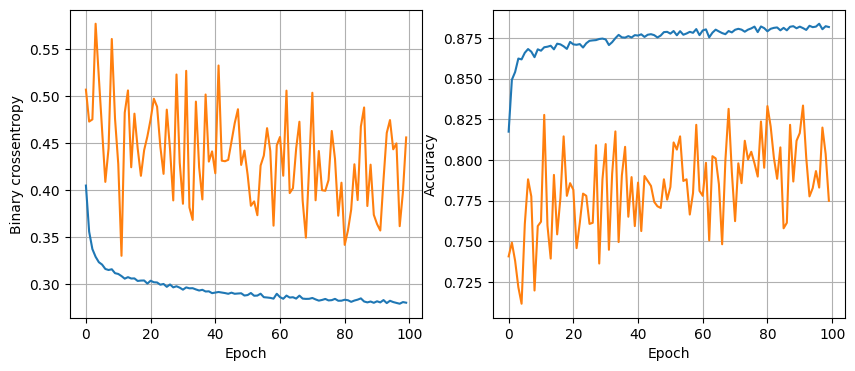

 16 nodes, dropout 0, learning_rate 0.01, batch size 64


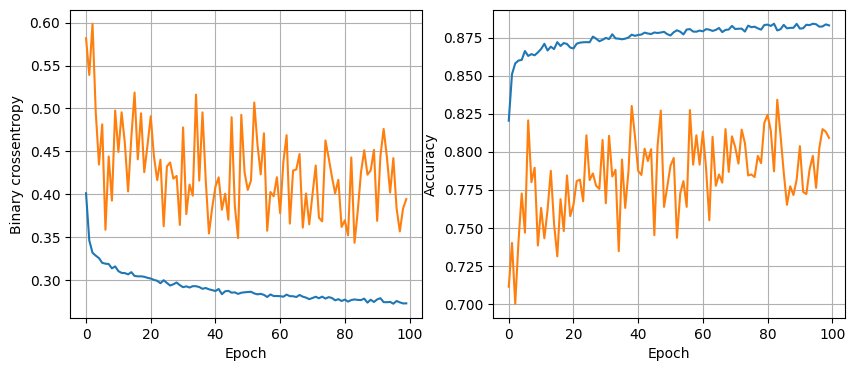

 16 nodes, dropout 0, learning_rate 0.01, batch size 128


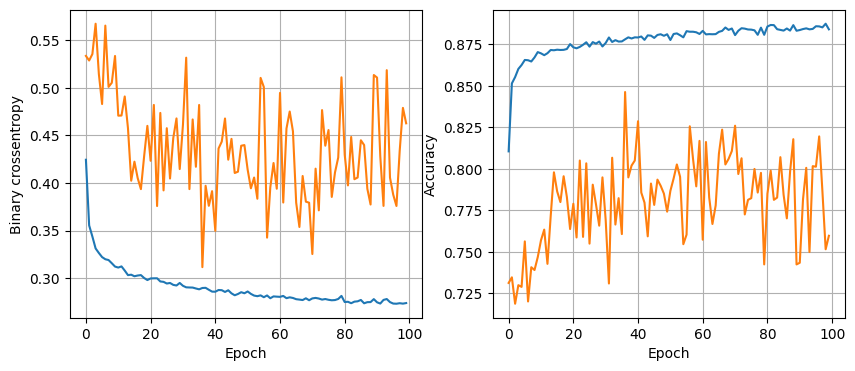

 16 nodes, dropout 0, learning_rate 0.005, batch size 32


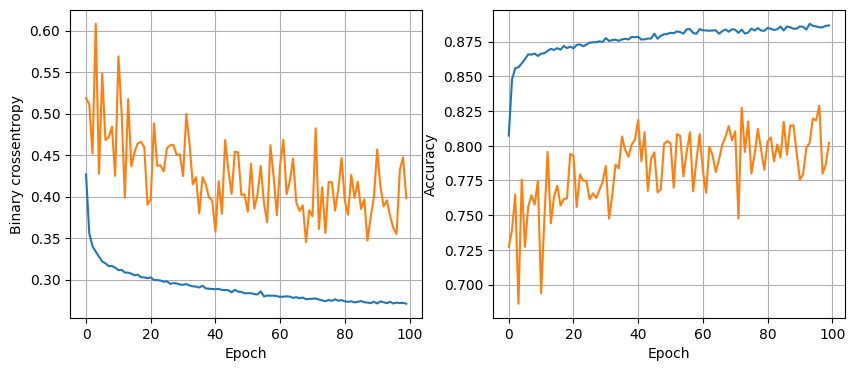

 16 nodes, dropout 0, learning_rate 0.005, batch size 64


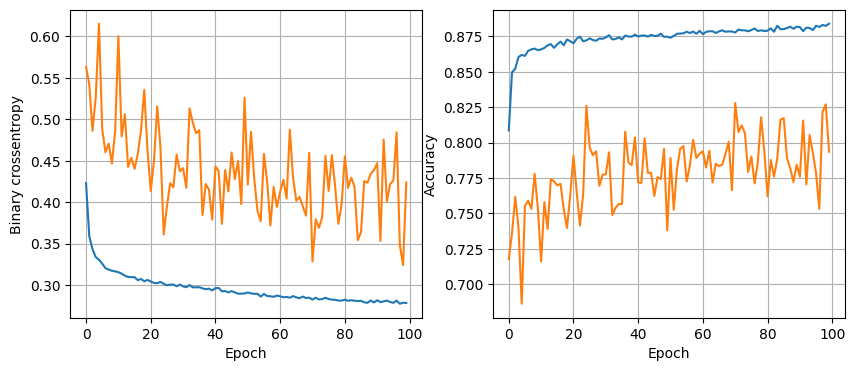

 16 nodes, dropout 0, learning_rate 0.005, batch size 128


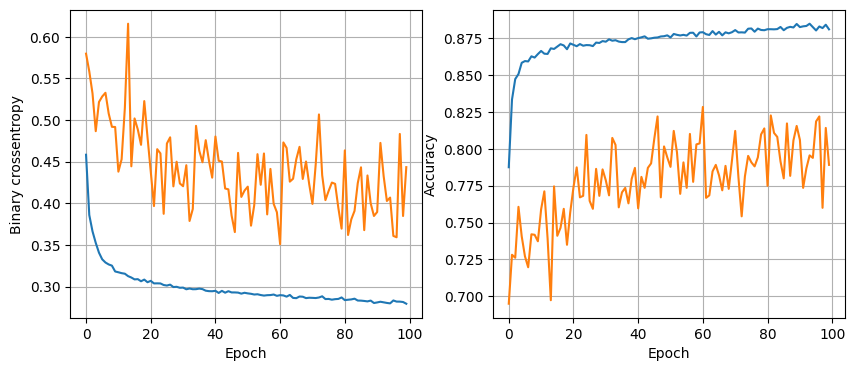

 16 nodes, dropout 0, learning_rate 0.0001, batch size 32


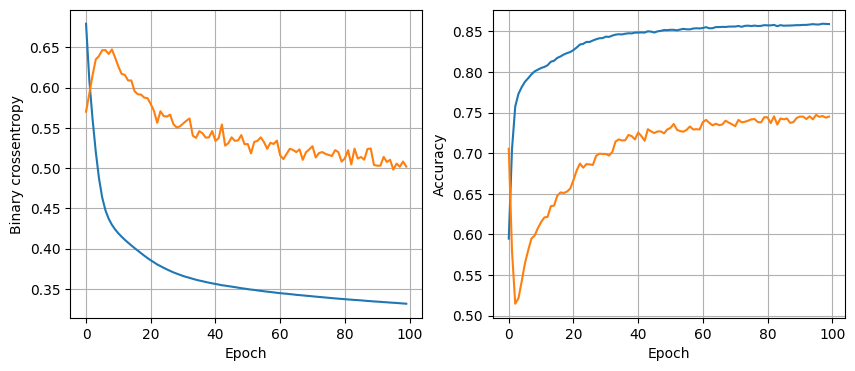

 16 nodes, dropout 0, learning_rate 0.0001, batch size 64


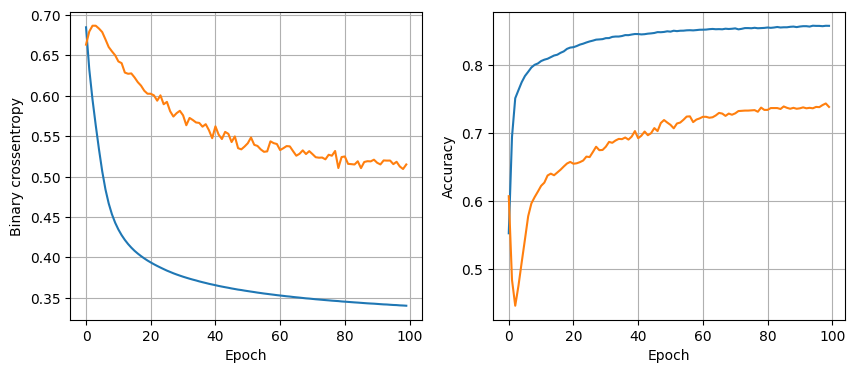

 16 nodes, dropout 0, learning_rate 0.0001, batch size 128


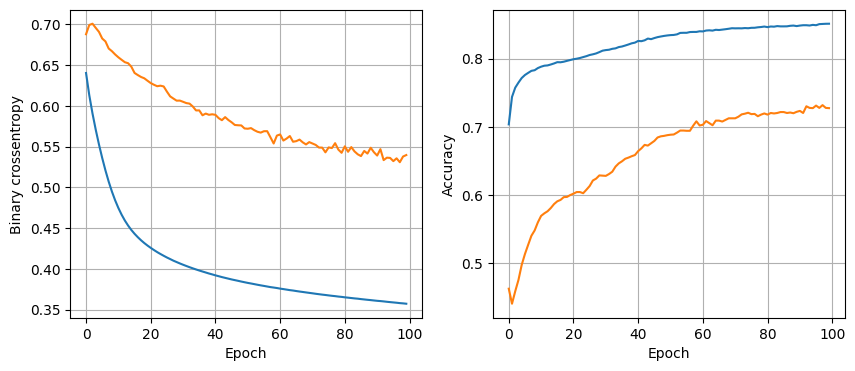

 16 nodes, dropout 0.2, learning_rate 0.01, batch size 32


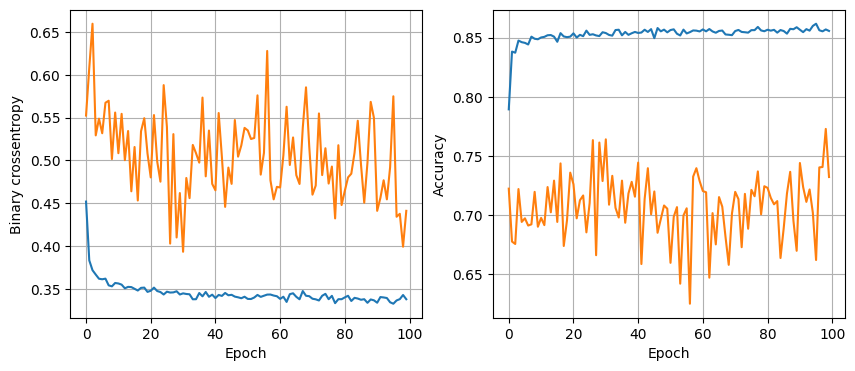

 16 nodes, dropout 0.2, learning_rate 0.01, batch size 64


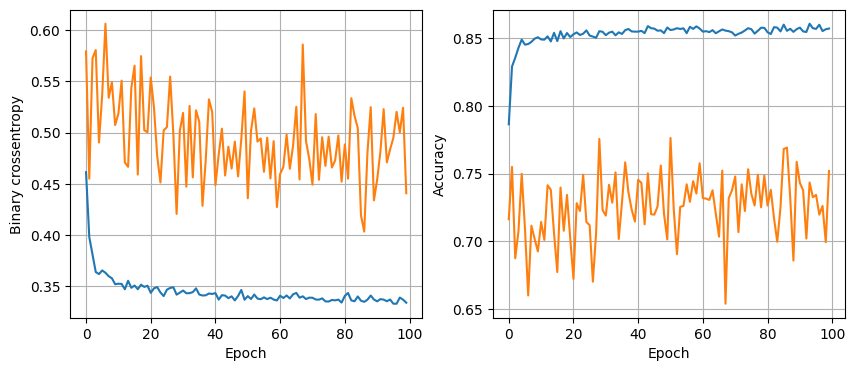

 16 nodes, dropout 0.2, learning_rate 0.01, batch size 128


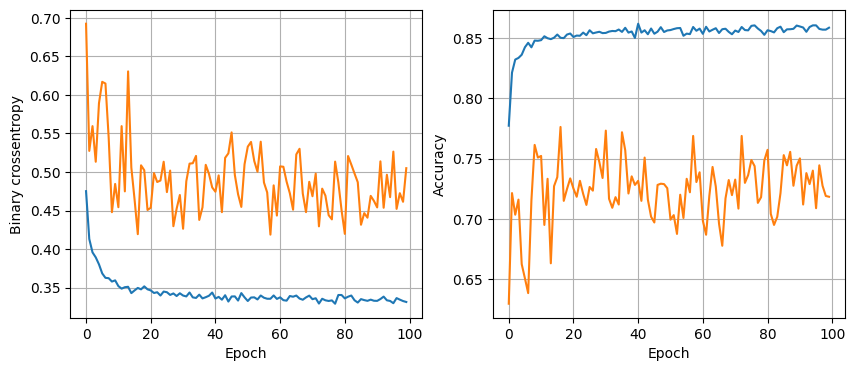

 16 nodes, dropout 0.2, learning_rate 0.005, batch size 32


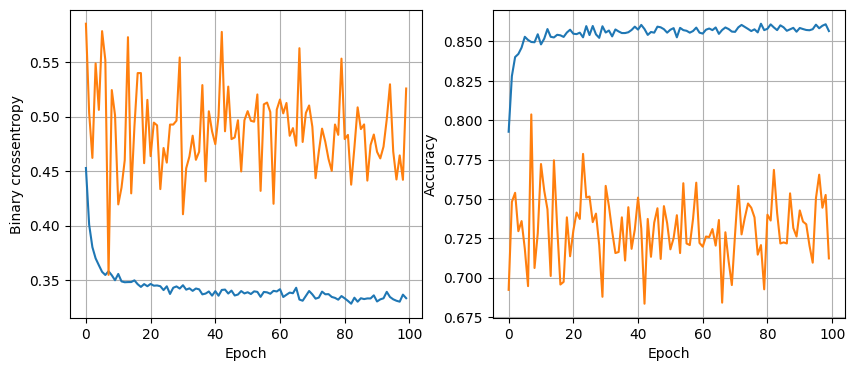

 16 nodes, dropout 0.2, learning_rate 0.005, batch size 64


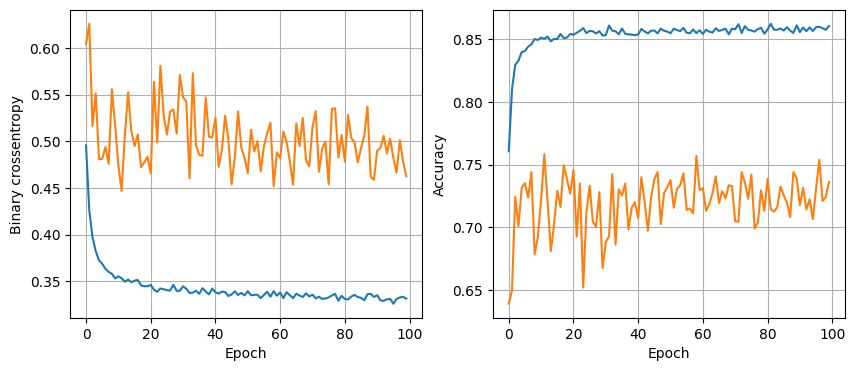

 16 nodes, dropout 0.2, learning_rate 0.005, batch size 128


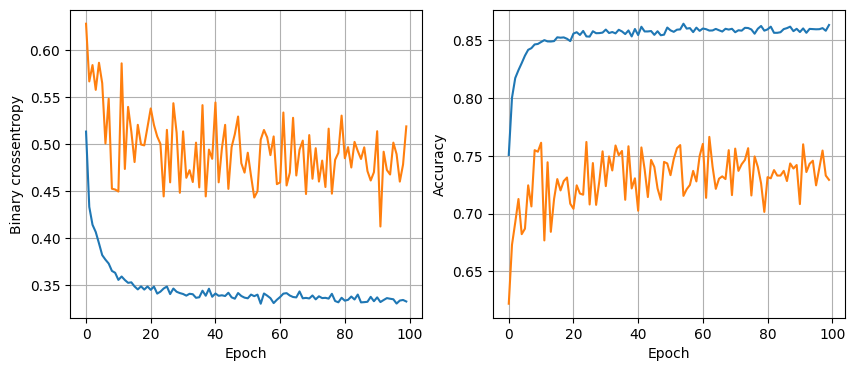

 16 nodes, dropout 0.2, learning_rate 0.0001, batch size 32


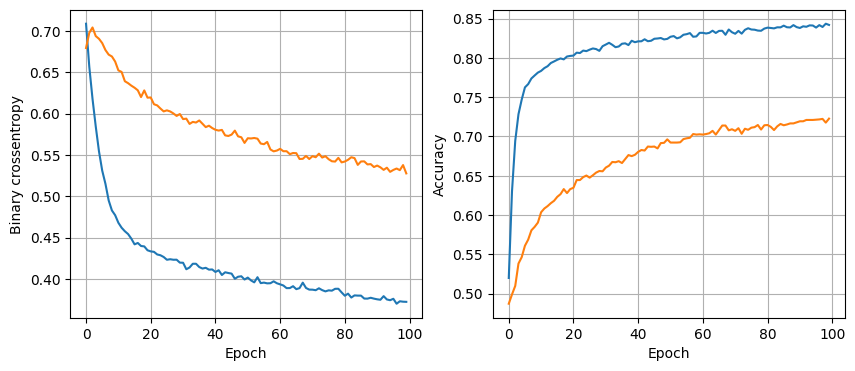

 16 nodes, dropout 0.2, learning_rate 0.0001, batch size 64


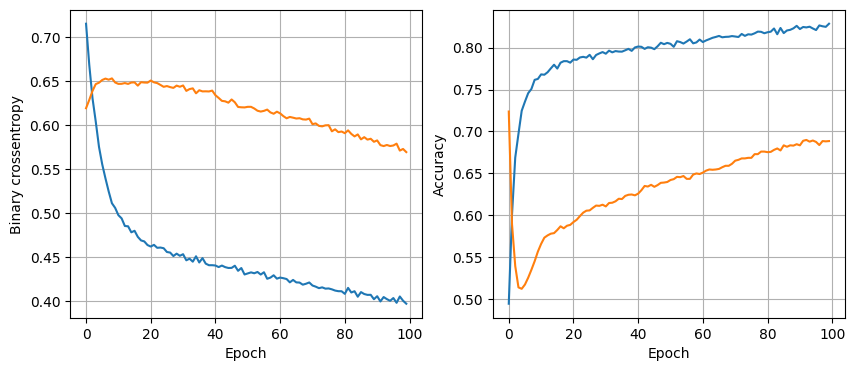

 16 nodes, dropout 0.2, learning_rate 0.0001, batch size 128


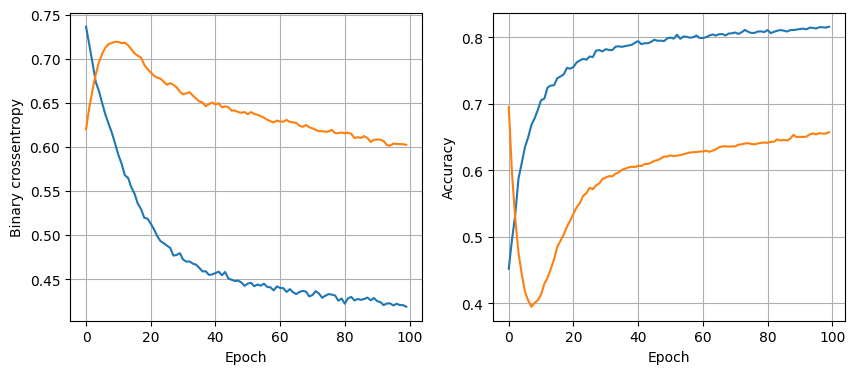

 32 nodes, dropout 0, learning_rate 0.01, batch size 32


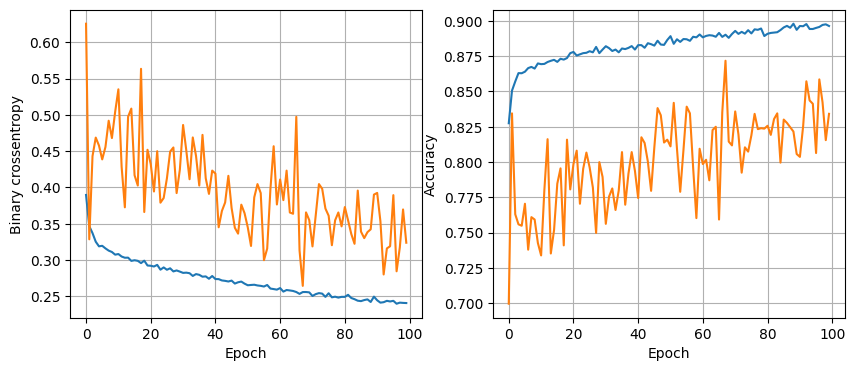

 32 nodes, dropout 0, learning_rate 0.01, batch size 64


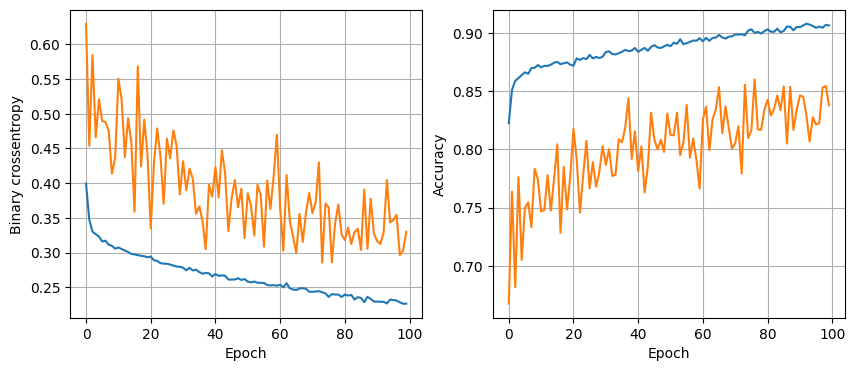

 32 nodes, dropout 0, learning_rate 0.01, batch size 128


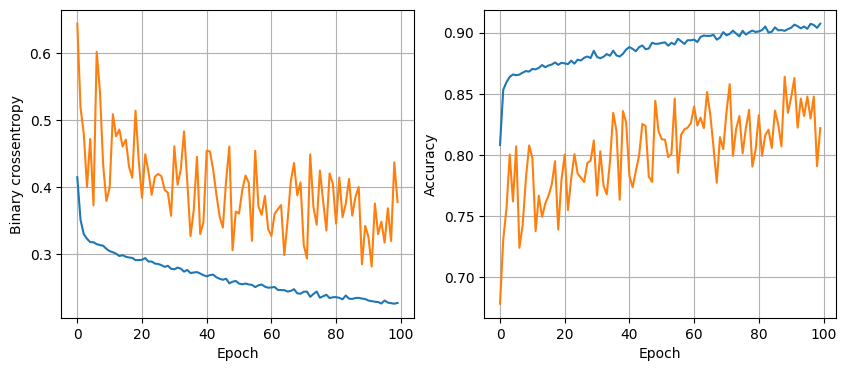

 32 nodes, dropout 0, learning_rate 0.005, batch size 32


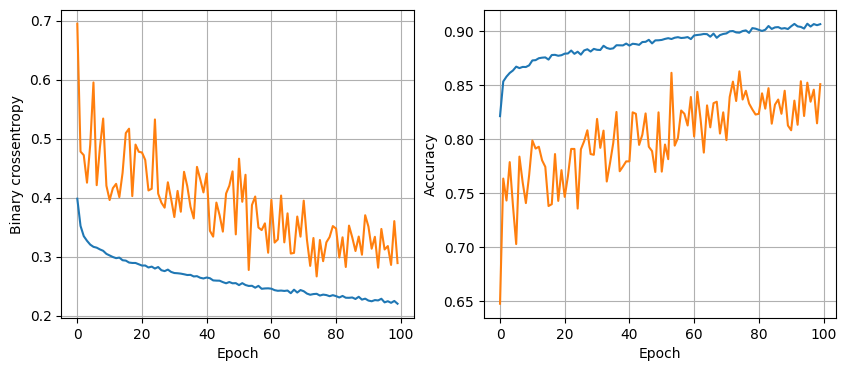

 32 nodes, dropout 0, learning_rate 0.005, batch size 64


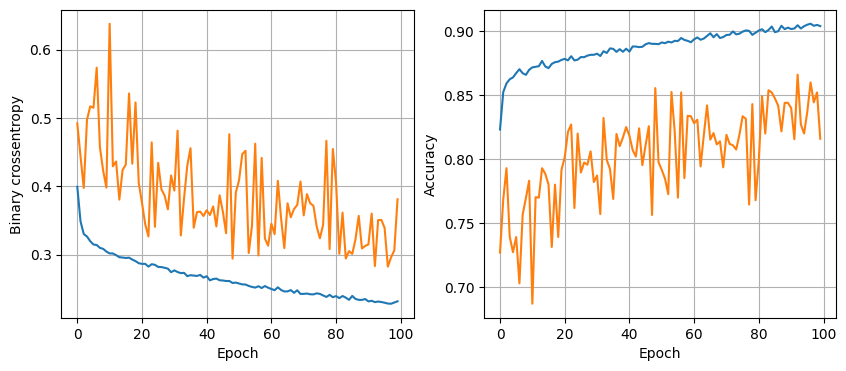

 32 nodes, dropout 0, learning_rate 0.005, batch size 128


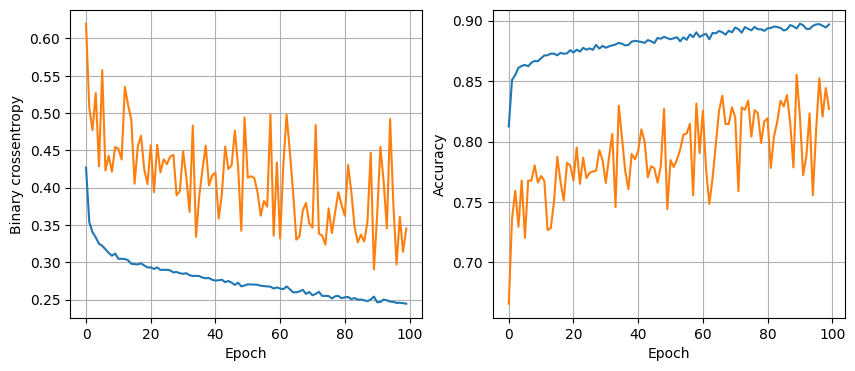

 32 nodes, dropout 0, learning_rate 0.0001, batch size 32


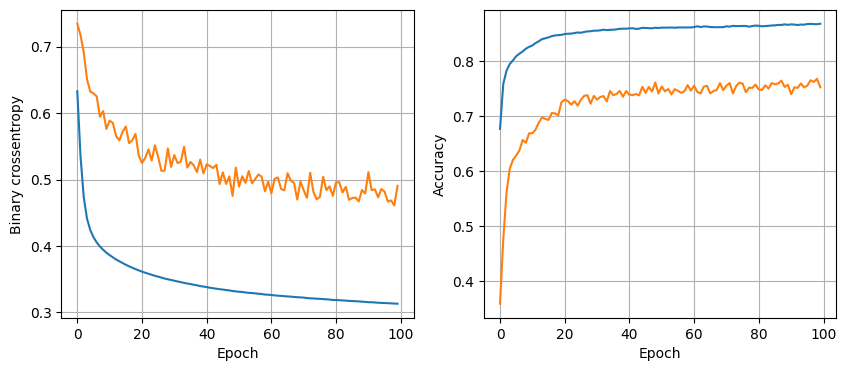

 32 nodes, dropout 0, learning_rate 0.0001, batch size 64


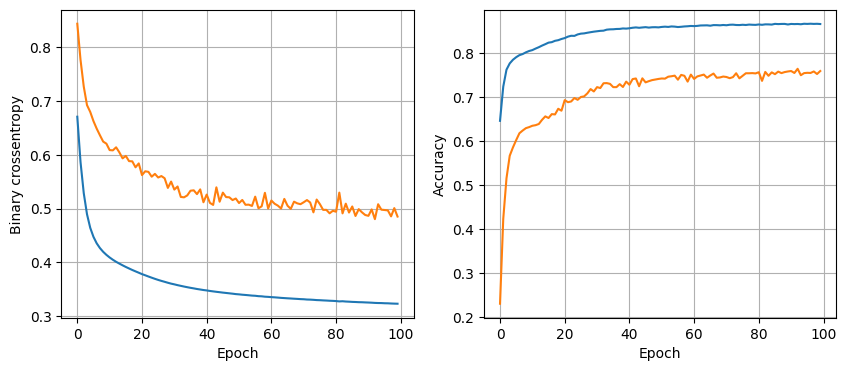

 32 nodes, dropout 0, learning_rate 0.0001, batch size 128


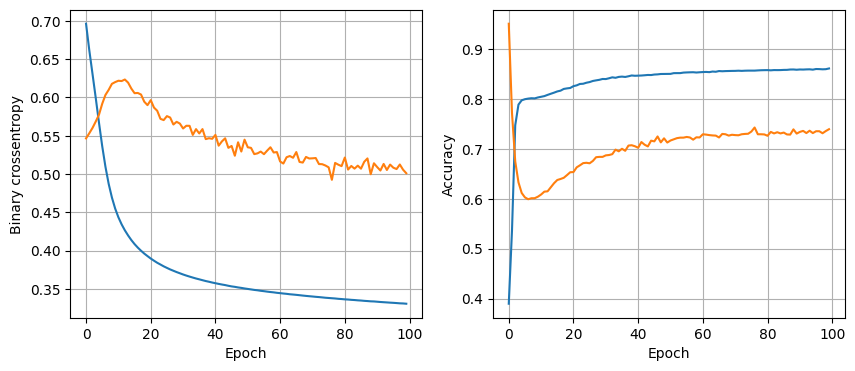

 32 nodes, dropout 0.2, learning_rate 0.01, batch size 32


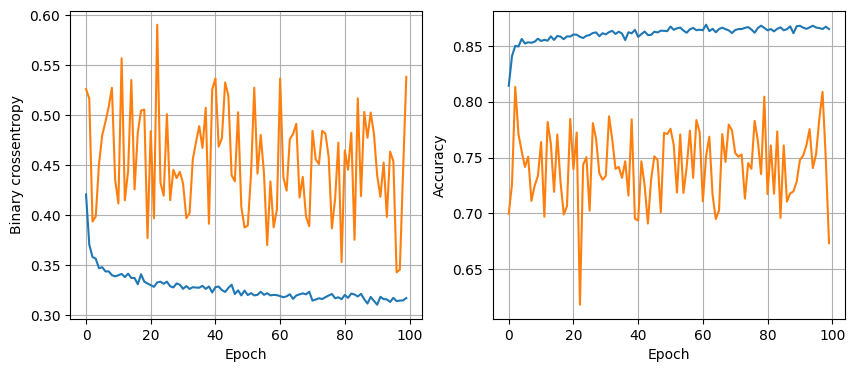

 32 nodes, dropout 0.2, learning_rate 0.01, batch size 64


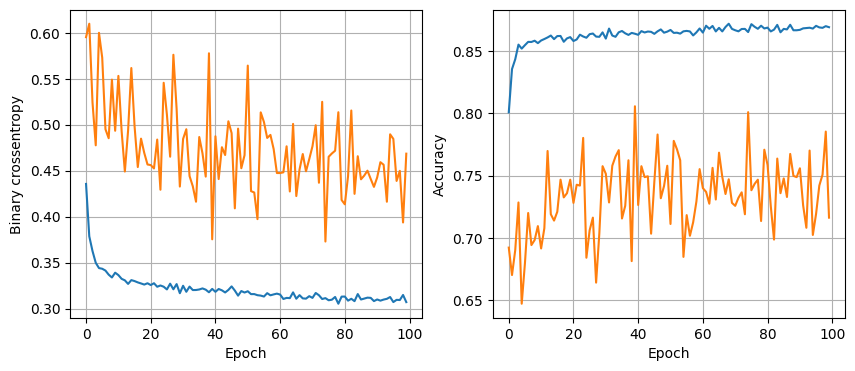

 32 nodes, dropout 0.2, learning_rate 0.01, batch size 128


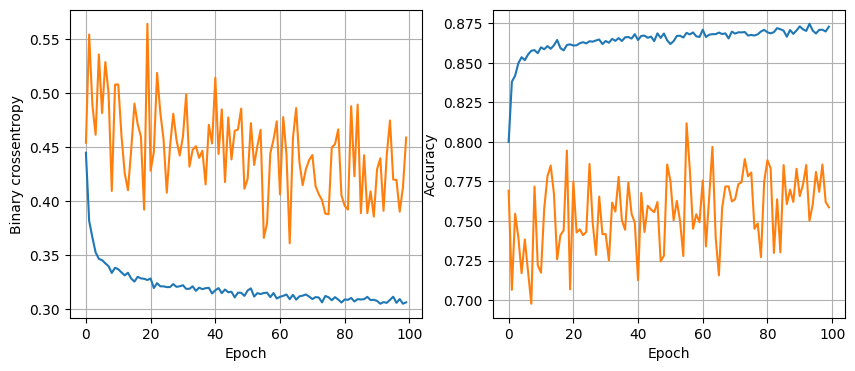

 32 nodes, dropout 0.2, learning_rate 0.005, batch size 32


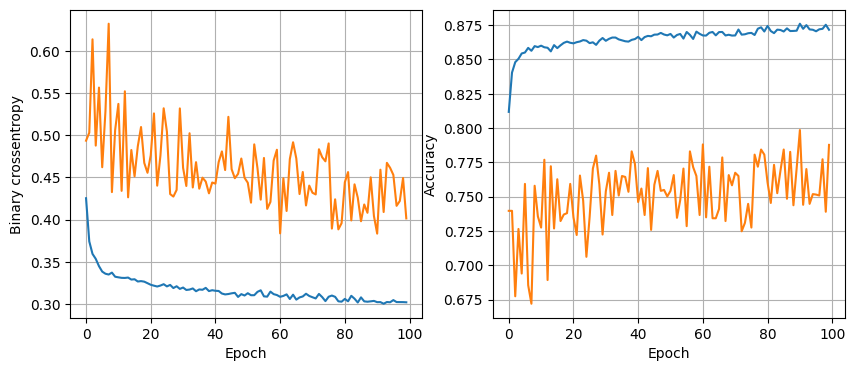

 32 nodes, dropout 0.2, learning_rate 0.005, batch size 64


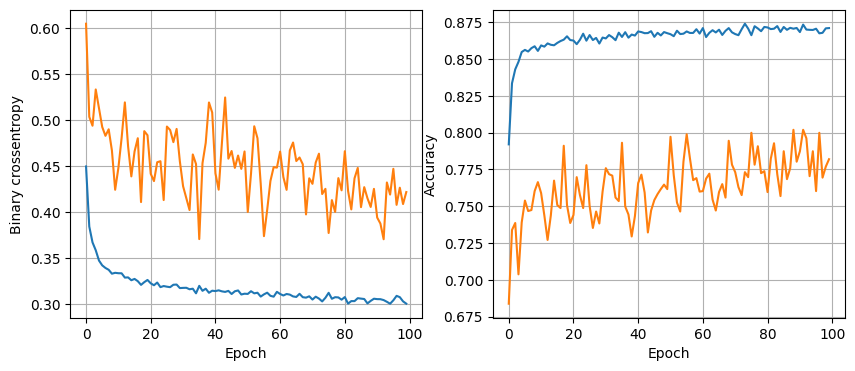

 32 nodes, dropout 0.2, learning_rate 0.005, batch size 128


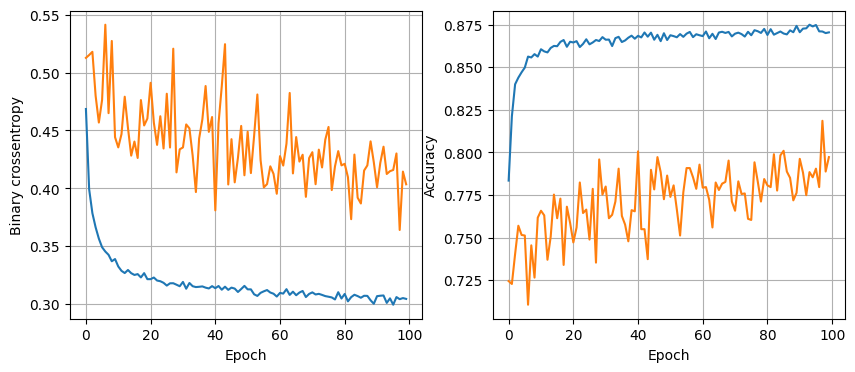

 32 nodes, dropout 0.2, learning_rate 0.0001, batch size 32


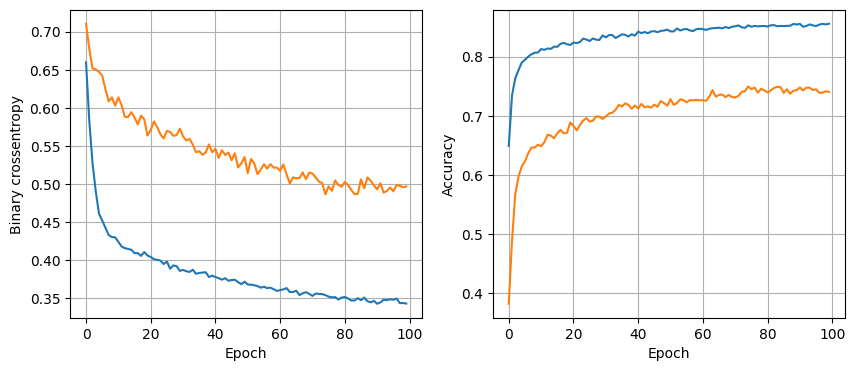

 32 nodes, dropout 0.2, learning_rate 0.0001, batch size 64


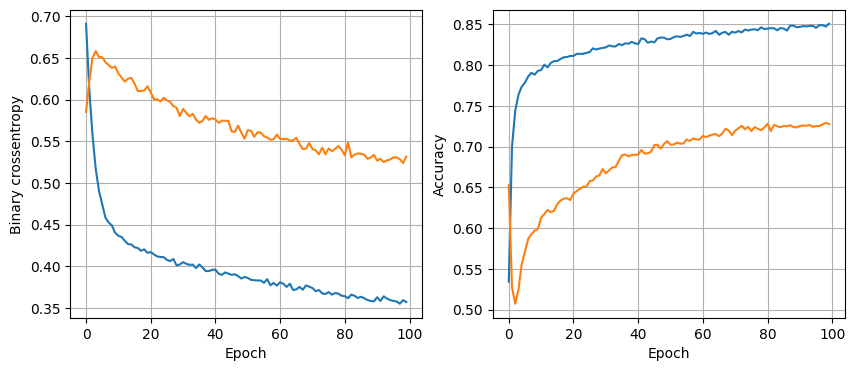

 32 nodes, dropout 0.2, learning_rate 0.0001, batch size 128


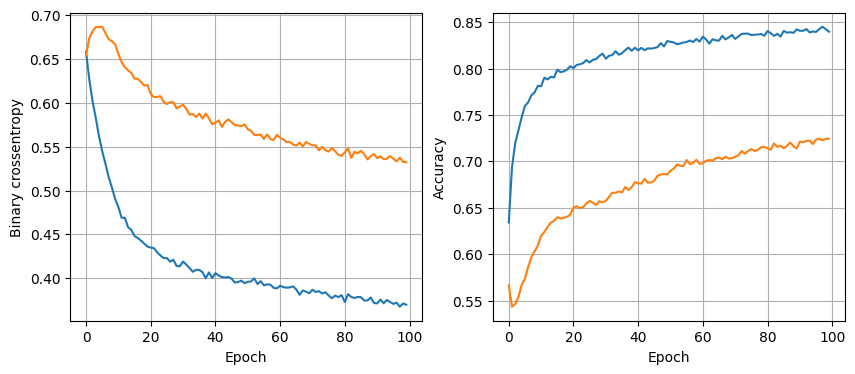

 64 nodes, dropout 0, learning_rate 0.01, batch size 32


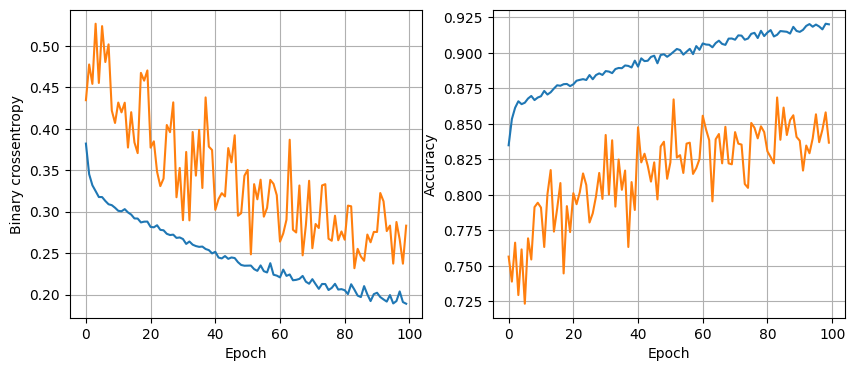

 64 nodes, dropout 0, learning_rate 0.01, batch size 64


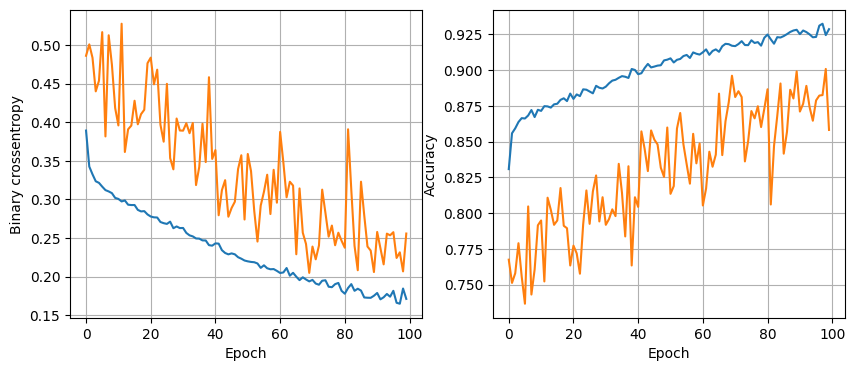

 64 nodes, dropout 0, learning_rate 0.01, batch size 128


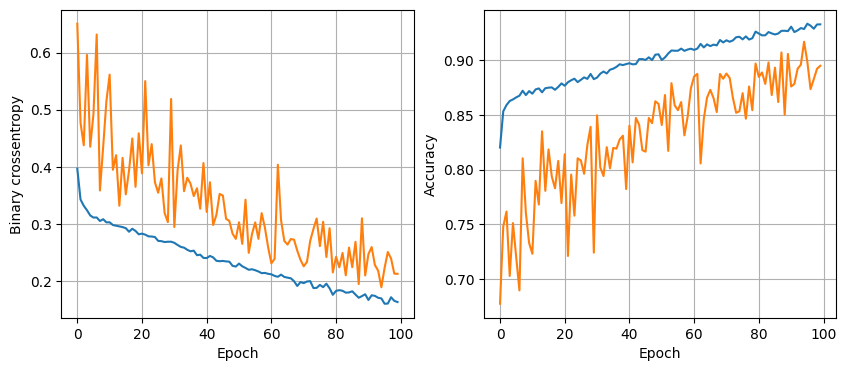

 64 nodes, dropout 0, learning_rate 0.005, batch size 32


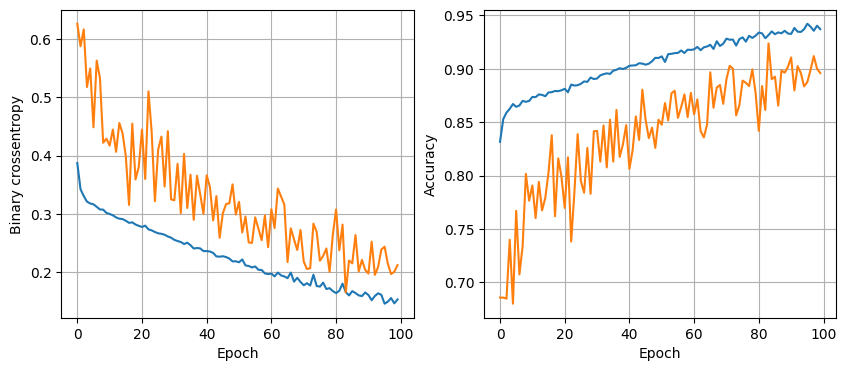

 64 nodes, dropout 0, learning_rate 0.005, batch size 64


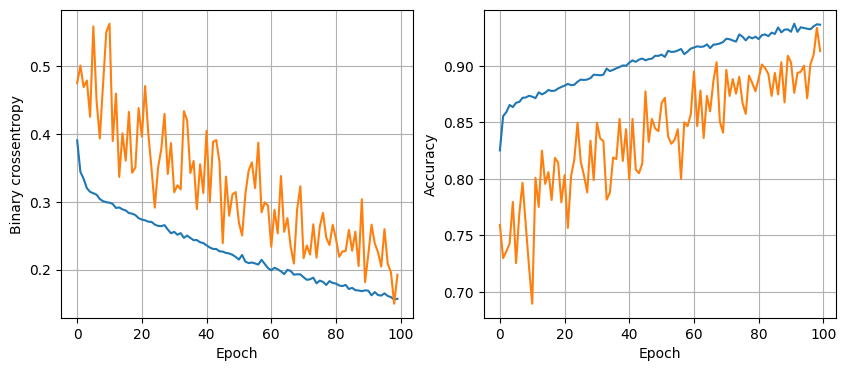

 64 nodes, dropout 0, learning_rate 0.005, batch size 128


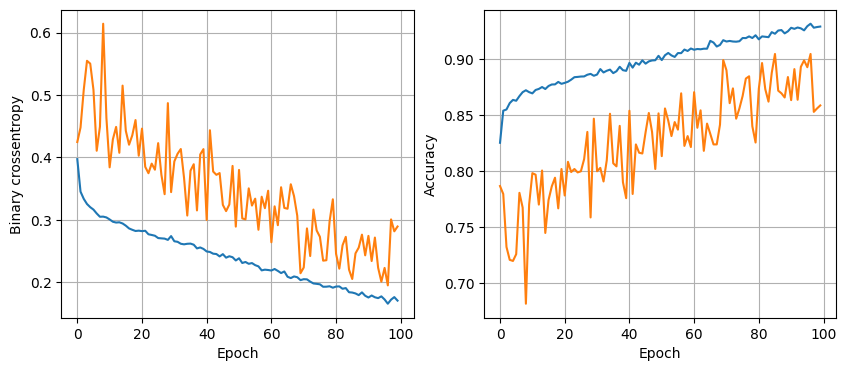

 64 nodes, dropout 0, learning_rate 0.0001, batch size 32


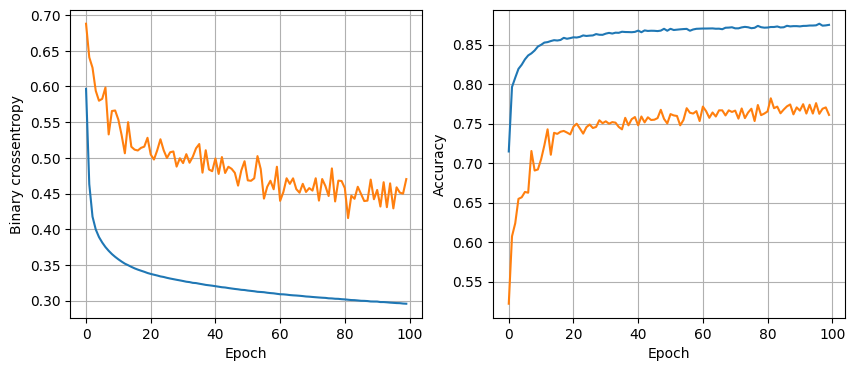

 64 nodes, dropout 0, learning_rate 0.0001, batch size 64


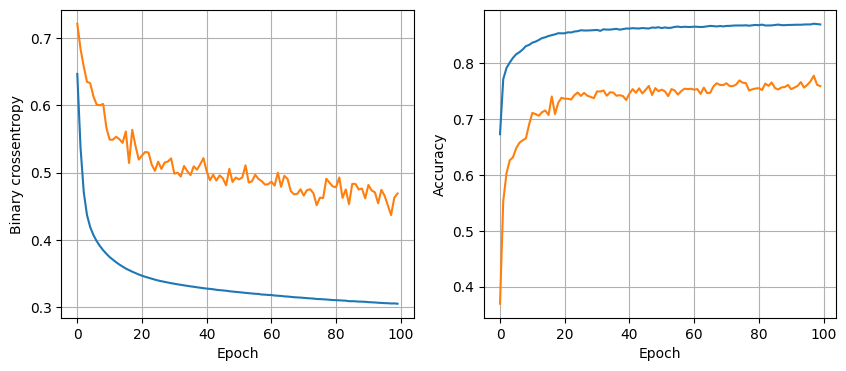

 64 nodes, dropout 0, learning_rate 0.0001, batch size 128


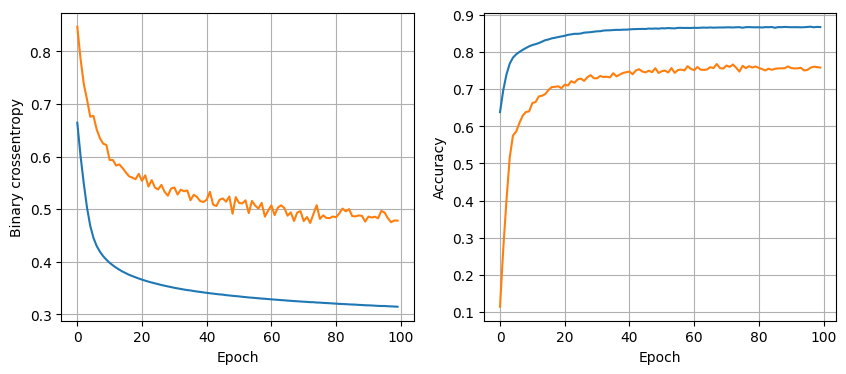

 64 nodes, dropout 0.2, learning_rate 0.01, batch size 32


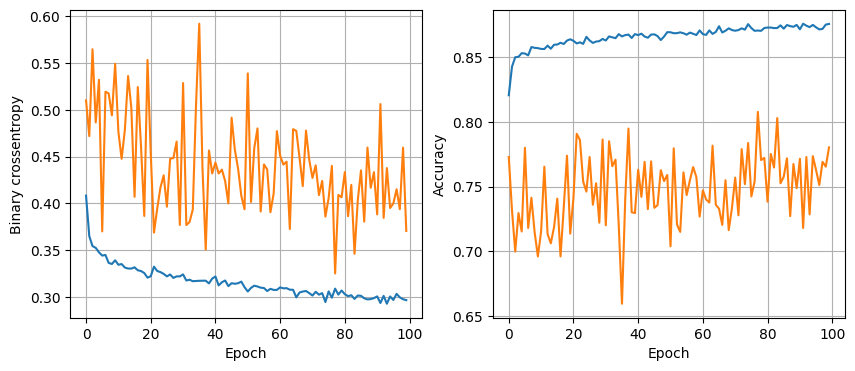

 64 nodes, dropout 0.2, learning_rate 0.01, batch size 64


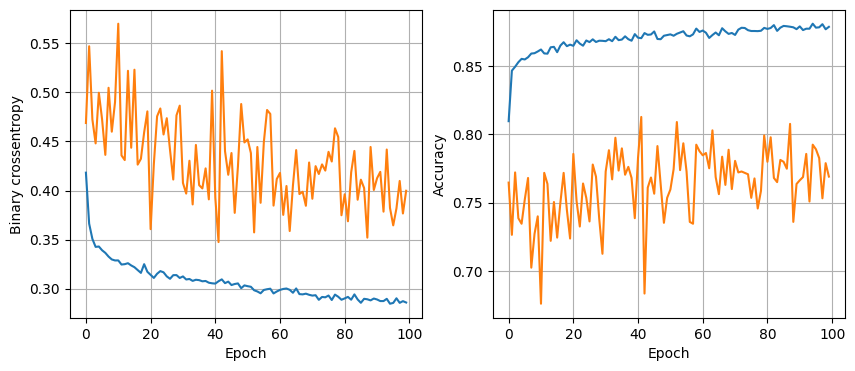

 64 nodes, dropout 0.2, learning_rate 0.01, batch size 128


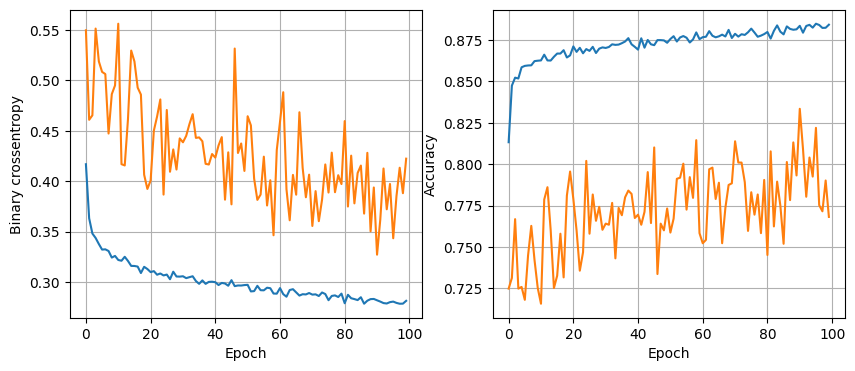

 64 nodes, dropout 0.2, learning_rate 0.005, batch size 32


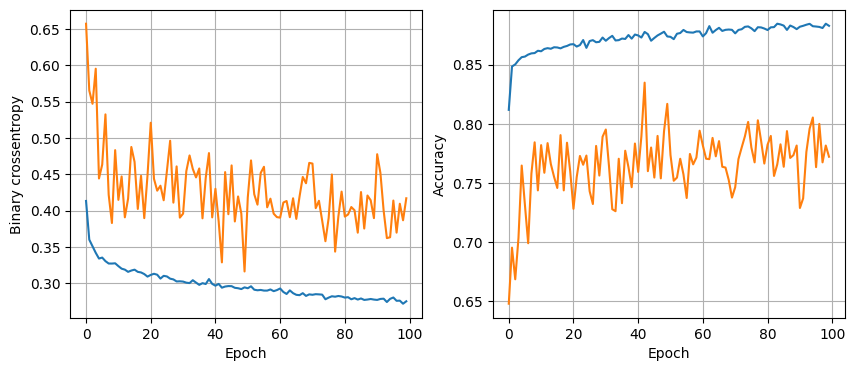

 64 nodes, dropout 0.2, learning_rate 0.005, batch size 64


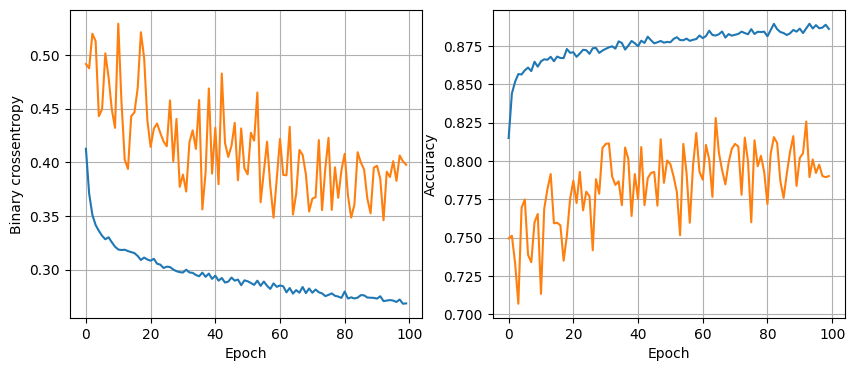

 64 nodes, dropout 0.2, learning_rate 0.005, batch size 128


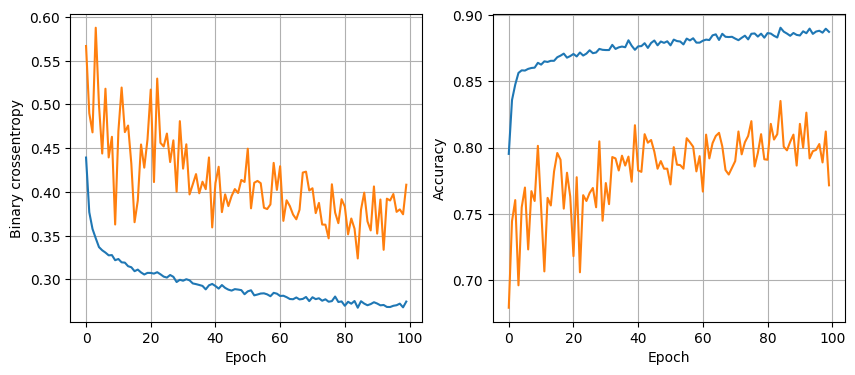

 64 nodes, dropout 0.2, learning_rate 0.0001, batch size 32


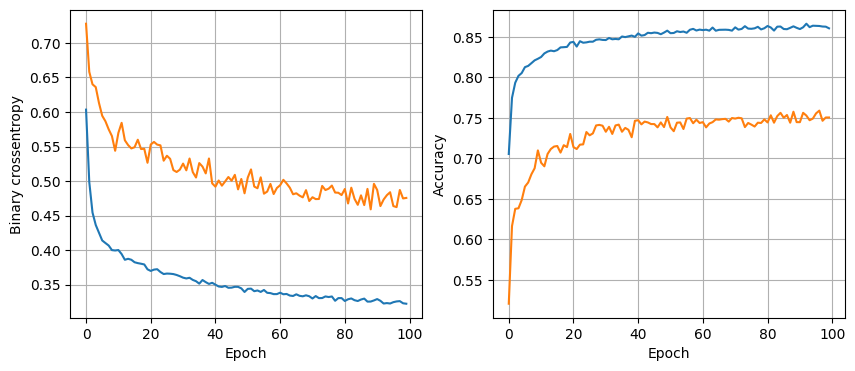

 64 nodes, dropout 0.2, learning_rate 0.0001, batch size 64


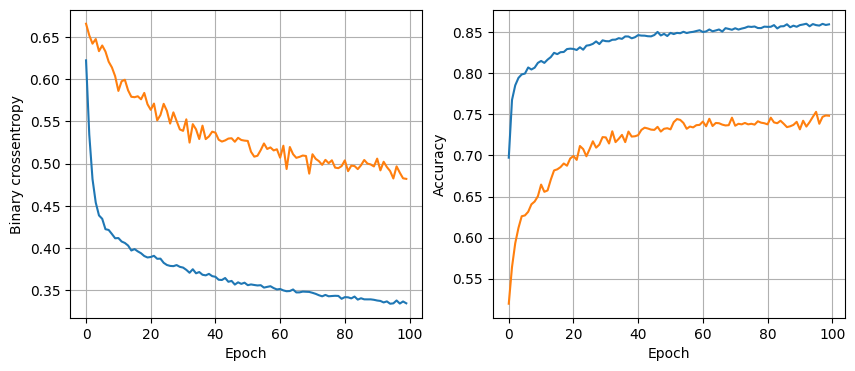

 64 nodes, dropout 0.2, learning_rate 0.0001, batch size 128


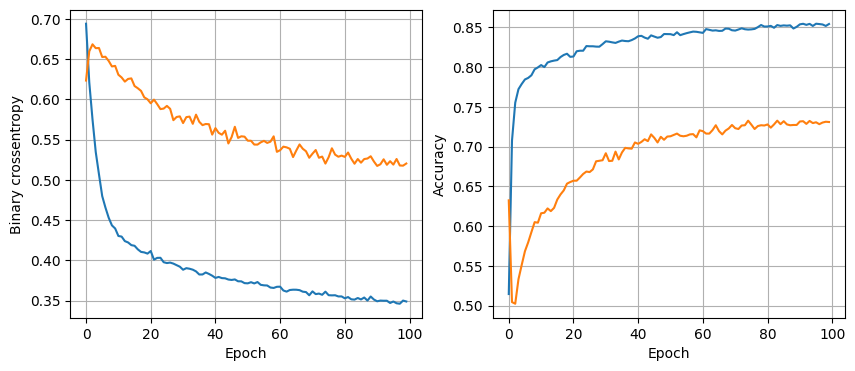

In [ ]:
# Now trying to experiment using different no of neurons and other parameters in the train_model method: epochs, batch_size, dropout_prob, learning rates.
least_val_loss = float('inf') #recording whichever model has least validation loss, first setting it to infinity so atleast it enters the loop
least_loss_model = None
epochs=100
for neurons in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.01,0.005, 0.0001]:
      for batch_size in [32, 64, 128]:
         print (f" {neurons} nodes, dropout {dropout_prob}, learning_rate {learning_rate}, batch size {batch_size}")
         model, history = train_model(X_train, y_train, neurons, dropout_prob, learning_rate, batch_size, epochs)
         plot_history(history)
         val_loss = model.evaluate(X_valid, y_valid, verbose=0)[0]  # checking validation loss also
         if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)

In [ ]:
y_pred = (y_pred>0.5).astype(int)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1322
           1       0.89      0.91      0.90      2482

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804

